# Sensor-level RSA example on the kiloword EEG dataset

This example demonstrates how to perform representational similarity analysis (RSA) on EEG data, using a searchlight approach.

In the searchlight approach, representational similarity is computed between the model and searchlight "patches". A patch is defined by a seed point (e.g. sensor Pz) and everything within the given radius (e.g. all sensors within 4 cm. of Pz). Patches are created for all possible seed points (e.g. all sensors), so you can think of it as a "searchlight" that moves from seed point to seed point and everything that is in the spotlight is used in the computation.

The radius of a searchlight can be defined in space, in time, or both. In this example, our searchlight will have a spatial radius of 4 cm. and a temporal radius of 0.1 cm.

The dataset will be the kiloword dataset [1]: approximately 1,000 words were presented to 75 participants in a go/no-go lexical decision task while event-related potentials (ERPs) were recorded.

[1] Dufau, S., Grainger, J., Midgley, KJ., Holcomb, PJ. A thousand words are worth a picture: Snapshots of printed-word processing in an event-related potential megastudy. Psychological science, 2015

In [1]:
import mne
import rsa
import numpy as np
%matplotlib inline

In [2]:
data_path = mne.datasets.kiloword.data_path(verbose=True)
epochs = mne.read_epochs(data_path + '/kword_metadata-epo.fif')
evokeds = [epochs[w].average() for w in epochs.metadata['WORD']]

In [3]:
model = epochs.metadata.iloc[:, 1:].values  # All word properties

In [12]:
evoked_rsa = rsa.rsa_evokeds(evokeds, model, evoked_dsm_metric='euclidean', spatial_radius=None, temporal_radius=0.01, n_jobs=4, verbose=True)


 61%|██████▏   | 155/253 [00:24<00:15,  6.27it/s]


100%|██████████| 253/253 [00:40<00:00,  6.75it/s]

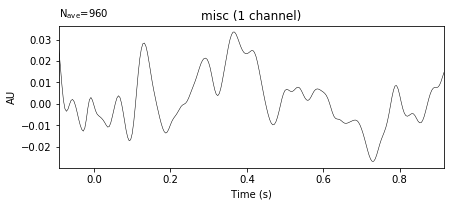

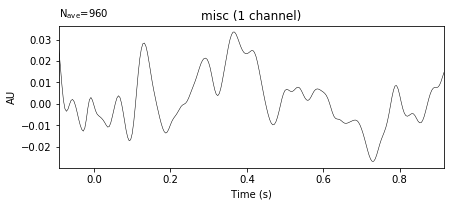

In [13]:
evoked_rsa.plot()

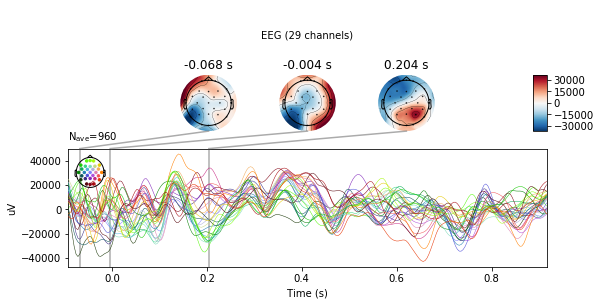

In [7]:
evoked_rsa.plot_joint();

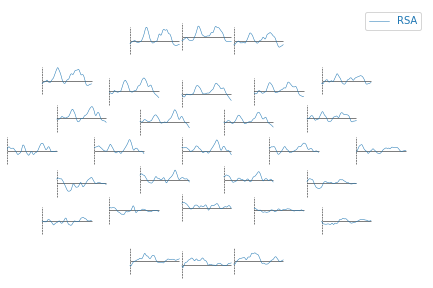

In [75]:
evoked_rsa.plot_topo();

In [14]:
import gensim

In [17]:
vecs = gensim.models.KeyedVectors.load_word2vec_format('/m/nbe/project/corpora/englishmodels/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [58]:
epochs.metadata.loc[840, 'WORD'] = 'whiskey'  # Alternate spelling
model = vecs[epochs.metadata.WORD]

In [59]:
import numpy as np
np.save('w2v.npy', model)

In [55]:
epochs.metadata.query('WORD == "whisky"')

,WORD,Concreteness,WordFrequency,OrthographicDistance,NumberOfLetters,BigramFrequency,ConsonantVowelProportion,VisualComplexity,"(840, WORD)"
